# Missing Data
Missing data is an important pre-processing step that needs to be handled before moving on to the modeling step.  Many libraries (including sklearn) won't be able to build a model with missing data.  This notebook shows a wide variety of methods for handling missing data.

In [26]:
import pandas as pd
import numpy as np
import pprint
import json

# set seed for reproducibility
np.random.seed(0)

import koleksyon.dta as dd
import koleksyon.lib as ll

In [3]:
nfl_data = dd.load_parquet("../data/pqnfl/", "NFLPlays_")

Number of Records Loaded: 49999


In [16]:
# get the number of missing data points per column
missing_values_count = nfl_data.isnull().sum()
print(json.dumps(missing_values_count.to_dict(), indent = 4))

{
    "Date": 0,
    "GameID": 0,
    "Drive": 0,
    "qtr": 0,
    "down": 7599,
    "time": 34,
    "TimeUnder": 0,
    "TimeSecs": 34,
    "PlayTimeDiff": 68,
    "SideofField": 67,
    "yrdln": 103,
    "yrdline100": 103,
    "ydstogo": 0,
    "ydsnet": 0,
    "GoalToGo": 103,
    "FirstDown": 3510,
    "posteam": 3282,
    "DefensiveTeam": 3282,
    "desc": 0,
    "PlayAttempted": 0,
    "Yards.Gained": 0,
    "sp": 0,
    "Touchdown": 0,
    "ExPointResult": 48771,
    "TwoPointConv": 49939,
    "DefTwoPoint": 49999,
    "Safety": 0,
    "Onsidekick": 0,
    "PuntResult": 47185,
    "PlayType": 0,
    "Passer": 30051,
    "Passer_ID": 0,
    "PassAttempt": 0,
    "PassOutcome": 29991,
    "PassLength": 30113,
    "AirYards": 0,
    "YardsAfterCatch": 0,
    "QBHit": 0,
    "PassLocation": 30113,
    "InterceptionThrown": 0,
    "Interceptor": 49377,
    "Rusher": 34627,
    "Rusher_ID": 0,
    "RushAttempt": 0,
    "RunLocation": 34776,
    "RunGap": 38900,
    "Receiver": 30808,

In general, the pandas profiling approach is better for looking at missing data than what we see above... but this flows nicely into counting total missing (below)

In [17]:
# how many total missing values do we have?
total_cells = np.product(nfl_data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

24.962342384102584

The question is what are we going to do about the missing?  One option would be to remove any row with a variable that is missing:

In [18]:
nfl_data.dropna()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


This results in ZERO rows!  In real datasets this happens frequently.  So dropping rows with missing values is not really an option.  We can consider removing columns that have at least one missing value:

In [19]:
# remove all columns with at least one missing value
columns_with_na_dropped = nfl_data.dropna(axis=1)
columns_with_na_dropped.head()

,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,desc,PlayAttempted,Yards.Gained,...,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,ExPoint_Prob,TwoPoint_Prob,Season
0,2009-09-10,2009091000,1,1,15,0,0,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,1,39,...,0,None,3,3,3,3,3,0.0,0.0,2009
1,2009-09-10,2009091000,1,1,15,10,5,(14:53) B.Roethlisberger pass short left to H....,1,5,...,0,None,3,3,3,3,3,0.0,0.0,2009
2,2009-09-10,2009091000,1,1,15,5,2,(14:16) W.Parker right end to PIT 44 for -3 ya...,1,-3,...,0,None,3,3,3,3,3,0.0,0.0,2009
3,2009-09-10,2009091000,1,1,14,8,2,(13:35) (Shotgun) B.Roethlisberger pass incomp...,1,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
4,2009-09-10,2009091000,1,1,14,8,2,(13:27) (Punt formation) D.Sepulveda punts 54 ...,1,0,...,0,None,3,3,3,3,3,0.0,0.0,2009


In [20]:
#quantify the data we lost:
print("Columns in original dataset: %d \n" % nfl_data.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 102 

Columns with na's dropped: 42


The column based removal of data (above) does help us remove the 'na' values, but it will ultimately make the model not as accurate as it could be if all of the relavent columns where included.  Team members who painfully work to extract these columns out of production systems will get pretty upset when the column is just thrown out in the first step of the analysis!  In some cases, it can be useful

The other problem with removing data is that, when the model goes to production, we will need to handle rows with missing data.  How will these rows get mapped?  Removing data that is incomplete may be an approach for getting statistical summaries, but its not an approach that we can take when our goal is to eventually produce a prediction that can be used in a production context, which is by definition data science!  What we need to do instead is create a mapping for all missing data to some value via transformation functions.  There are some methods to learn the transformation functions directly inside of the machine learning training/testing.  We will cover these in a later notebook.  For now, we are going to use algorithm independent methods and simple transformation logic in code.  The advantage of these methods is that they can be used across any project regardless of machine learning approach.

# 'fillna' method
The simplest method to handle missing data is to just use the pandas library, specifically 'df.fillna(0)' to replace the null cells with cells that contain another value (e.g. 0).  The method can be used on a specific column, or over the entire table.  Here is an example of this approach on the entire table:

In [23]:
df = nfl_data.fillna(-1)
pd.set_option('display.max_columns', None)
df

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult,Returner,BlockingPlayer,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,-1.0,15:00,15,3600.0,0.0,TEN,30.0,30.0,0,0,0.0,-1.0,PIT,TEN,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,1,39,0,0,-1,-1,-1.0,0,0,-1,Kickoff,-1,None,0,-1,-1,0,0,0,-1,0,-1,-1,None,0,-1,-1,-1,None,0,-1,S.Logan,-1,M.Griffin,-1,-1,-1.0,0,-1,-1,0,0,-1,0,-1,-1,-1,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001506,0.179749,0.006639,0.281138,0.213700,0.003592,0.313676,0.0,0.0,0.323526,2.014474,-1.000000,-1.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-1.000000,-1.000000,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,42.0,58.0,10,5,0.0,0.0,PIT,TEN,(14:53) B.Roethlisberger pass short left to H....,1,5,0,0,-1,-1,-1.0,0,0,-1,Pass,B.Roethlisberger,00-0022924,1,Complete,Short,-3,8,0,left,0,-1,-1,None,0,-1,-1,H.Ward,00-0017162,1,-1,-1,-1,C.Hope,-1,-1,-1.0,0,-1,-1,0,0,-1,0,-1,-1,-1,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.000969,0.108505,0.001061,0.169117,0.293700,0.003638,0.423011,0.0,0.0,2.338000,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,47.0,53.0,5,2,0.0,0.0,PIT,TEN,(14:16) W.Parker right end to PIT 44 for -3 ya...,1,-3,0,0,-1,-1,-1.0,0,0,-1,Run,-1,None,0,-1,-1,0,0,0,-1,0,-1,W.Parker,00-0022250,1,right,end,-1,None,0,-1,-1,-1,S.Tulloch,-1,-1,-1.0,0,-1,-1,0,0,-1,0,-1,-1,-1,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001057,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.0,0.0,2.415907,-1.402760,-1.000000,-1.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,-1.000000,-1.000000,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,44.0,56.0,8,2,0.0,0.0,PIT,TEN,(13:35) (Shotgun) B.Roethlisberger pass incomp...,1,0,0,0,-1,-1,-1.0,0,0,-1,Pass,B.Roethlisberger,00-0022924,1,Incomplete Pass,Deep,34,0,0,right,0,-1,-1,None,0,-1,-1,M.Wallace,00-0026901,0,-1,-1,-1,-1,-1,-1,-1.0,0,-1,-1,0,0,-1,0,-1,-1,-1,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001434,0.149088,0.001944,0.234801,0.289336,0.004776,0.318621,0.0,0.0,1.013147,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,44.0,56.0,8,2,0.0,1.0,PIT,TEN,(13:27) (Punt formation) D.Sepulveda punts 54 ...,1,0,0,0,-1,-1,-1.0,0,0,Clean,Punt,-1,None,0,-1,-1,0,0,0,-1,0,-1,-1,None,0,-1,-1,-1,None,0,-1,-1,-1,-1,-1,-1,-1.0,0,-1,-1,0,0,-1,0,-1,-1,-1,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001861,0.213480,0.003279,0.322262,0.244603,0.006404,0.208111,0.0,0.0,-0.699436,2.097796,-1.000000,-1.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,-1.000000,-1.000000,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

Above, if you compare the -1 and 0 cells, You can see clearly what a horrible mistake it would have been to fill all of the NA values with '0'.  For example, if we just look at 'FirstDown', we can see that zero is a value in the original dataset!

In [25]:
nfl_data['FirstDown']

0        NaN
1        0.0
2        0.0
3        0.0
4        1.0
        ... 
49994    1.0
49995    0.0
49996    1.0
49997    0.0
49998    0.0
Name: FirstDown, Length: 49999, dtype: float64

Statistics for  Variable:	FirstDown
Number of Data Points:	49999
Min:	nan
Max:	nan
Mean:	0.28488459635612723
Mode:	0.0
Variance:	0.4513594610896778
Excess kurtosis of normal distribution (should be 0):	0.4513594610896778
Skewness of normal distribution (should be 0):	nan



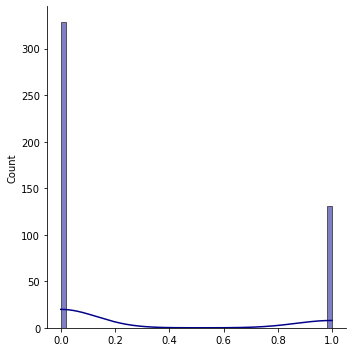

In [27]:
ll.var_analysis(nfl_data, 'FirstDown')

We can still use fillna, we just need to either A. fill the na values with an uninformative value such as the mean, median or mode OR B. fill the na cells with a value that doesn't exist in the original distribtuion, for example -1 in this case.

Statistics for  Variable:	FirstDown
Number of Data Points:	49999
Min:	-1.0
Max:	1.0
Mean:	0.19468389367787356
Mode:	0.0
Variance:	0.5451466621712171
Excess kurtosis of normal distribution (should be 0):	0.5451466621712171
Skewness of normal distribution (should be 0):	0.0847709695022762



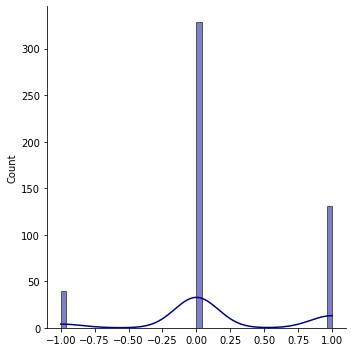

In [32]:
nfl_data['FirstDown'] = nfl_data['FirstDown'].fillna(-1)
ll.var_analysis(nfl_data, 'FirstDown')

Usually, the best approach to handle data missingness, is to understand what the variable represents, and what the missingness represents.  Part of this analysis requires understanding the frequency of the missingness.  Once the missingness is well understood, then we can build a mapping function from the original data to a representation that can be handled by our algorithms.

Sometimes you will hear data scientists talk about data imputation or SMOTE (Synthetic Minority Oversampling Technique). SMOTE works best when a dataset is inbalanced, i.e. a large percent of the data (e.g. 90%) represents one class [1].  Data imputation works best when data values are missing [2].  


[1] https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

[2] https://scikit-learn.org/stable/modules/impute.html#impute

/Users/m102417/koleksyon/notebooks


In [41]:
df = dd.load_parquet("../data/melbourne/", "melbourne_")

Number of Records Loaded: 34857


It is important to quantify the error as you impute data (or drop rows, or fill in missing values in various ways ect.)  In classification problems, F1 score and the ROC curve is usually used.  In regression problems, Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R^2 (R Squared) values are commonly used to compute fit [3].

[3] https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d


In [42]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [35]:
#TODO: make a less complex version of SMOTE
#!pip install imbalanced-learn

# check version number
#import imblearn
#print(imblearn.__version__)